In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Reading the data
data = pd.read_csv('day.csv')

In [3]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#Checking the no of rows and columns
data.shape

(730, 16)

In [5]:
#checking the detailed iformation about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
#Describing the total size of data
data.size

11680

In [8]:
#Performing the EDA
#Droping the columns which is not needed
#instant: as it is the day's record index
#dteday: since the date's elements, such as the year, month, and weekday, are already present
#Because cnt is the total of both values, casual and registered are in cnt.

In [9]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
#removing the instant column because it is only an index column with no bearing on our goal.
data.drop(['instant'],axis=1,inplace=True)

In [11]:
data.drop(['dteday'],axis=1,inplace=True)
#dteday isn't useful because it's covered by month and weekday.


In [12]:
data.drop(['casual'],axis=1,inplace=True)
data.drop(['registered'],axis=1,inplace=True)
#The aggregate of these is removing casual and registering as a cnt.

In [13]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [15]:
data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [16]:
data.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


In [17]:
#So, as can be seen from the above correlation, the season, month, and weekday, which are supposed to be non-numerical, are numerical and should be modified.

In [18]:
data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [19]:

data.nunique() 

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [20]:
#provides information about the data's unique values.

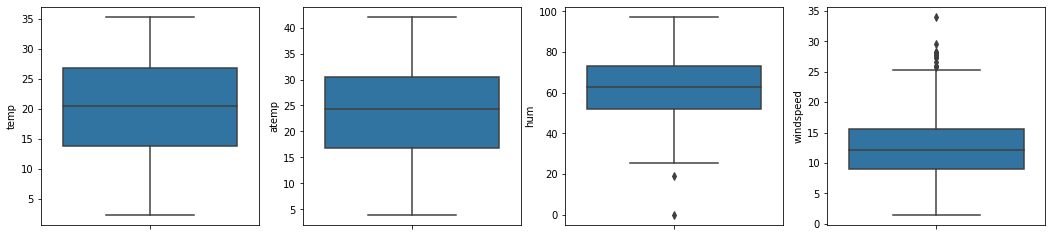

In [22]:
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))
i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=data)
    i+=1

In [23]:
#As can be seen from the plots above, there are no outliers.

In [26]:
#converting largely quantitative categorical data to more meaningful categorical data
data.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)
data.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)
data.mnth = data.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})
data.weekday = data.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})

In [27]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


In [28]:
#To check for a linear relationship, make pairplots.

<Figure size 4320x4320 with 0 Axes>

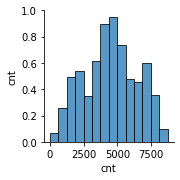

In [32]:
plt.figure(figsize = (60,60))
sns.pairplot(data=data,vars=['cnt'])
plt.show()

<Figure size 4320x4320 with 0 Axes>

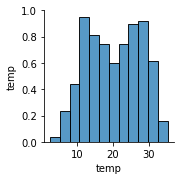

In [34]:
plt.figure(figsize = (60,60))
sns.pairplot(data=data,vars=['temp'])
plt.show()

<Figure size 4320x4320 with 0 Axes>

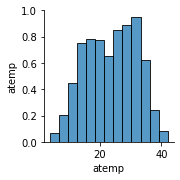

In [35]:
plt.figure(figsize = (60,60))
sns.pairplot(data=data,vars=['atemp'])
plt.show()

<Figure size 4320x4320 with 0 Axes>

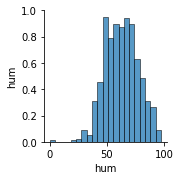

In [36]:
plt.figure(figsize = (60,60))
sns.pairplot(data=data,vars=['hum'])
plt.show()

<Figure size 4320x4320 with 0 Axes>

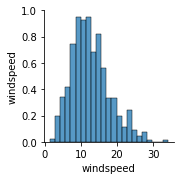

In [37]:
plt.figure(figsize = (60,60))
sns.pairplot(data=data,vars=['windspeed'])
plt.show()

<Figure size 1080x2160 with 0 Axes>

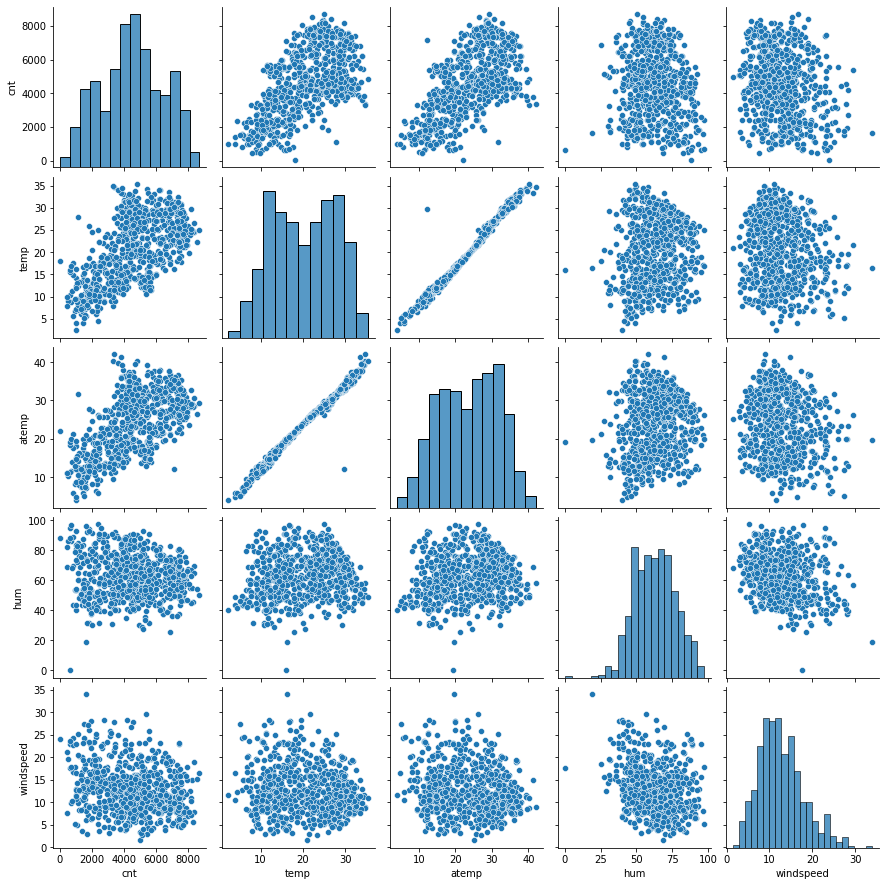

In [38]:
plt.figure(figsize = (15,30))
sns.pairplot(data=data,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

In [39]:
#As can be seen from the charts above, temp and atemp have a high correlation.
#We may also deduce from the plots that TEMP and ATEMP have a similar relationship.

<Figure size 1440x1080 with 0 Axes>

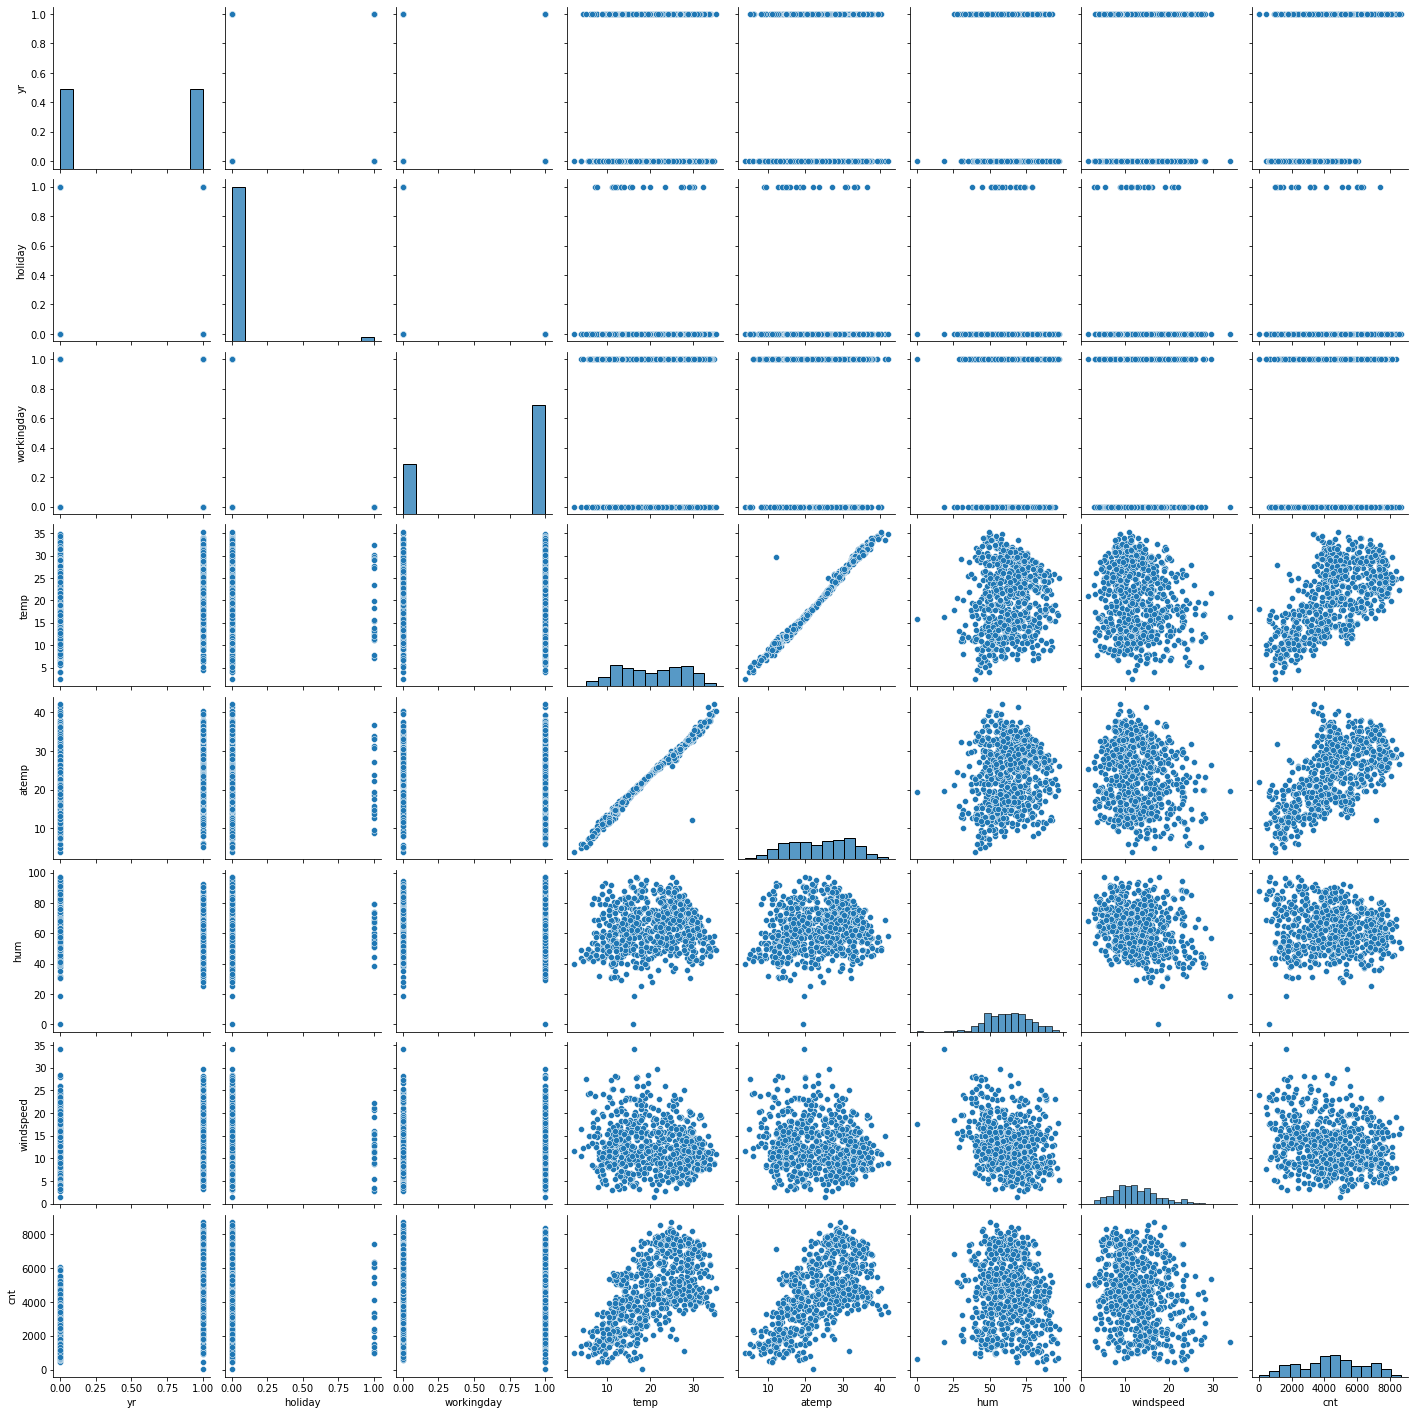

In [40]:
#Finding correlation from numerical factors through visualising data
plt.figure(figsize=(20,15))
sns.pairplot(data)
plt.show()

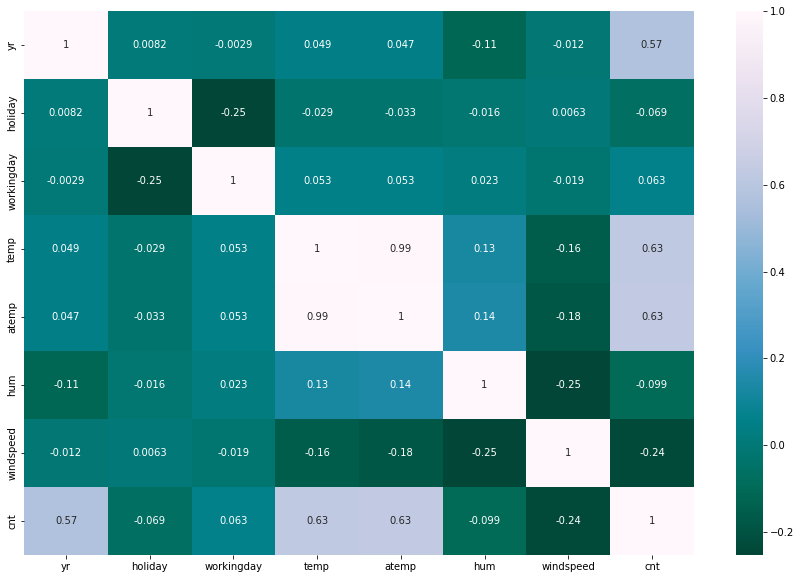

In [42]:
#Heatmap for correlation and numeric variable
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),cmap="PuBuGn_r",annot=True)
plt.show()

<AxesSubplot:xlabel='season', ylabel='cnt'>

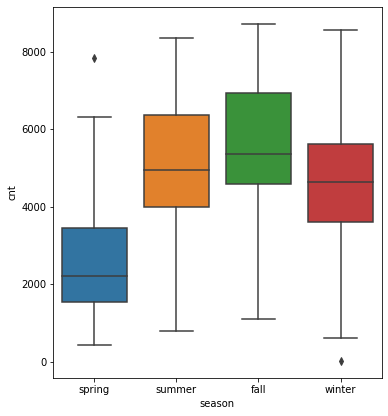

In [43]:
#creating a visual representation of categorical variables
plt.figure(figsize=(20,15))
plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt',data=data)

<AxesSubplot:xlabel='yr', ylabel='cnt'>

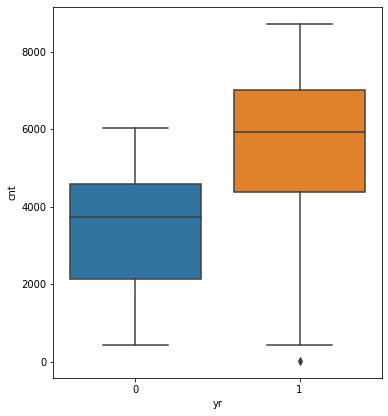

In [52]:
plt.figure(figsize=(20,15))
plt.subplot(2,3,2)
sns.boxplot(x='yr',y='cnt',data=data)

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

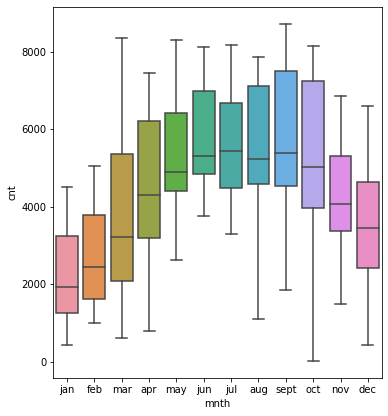

In [51]:
plt.figure(figsize=(20,15))
plt.subplot(2,3,3)
sns.boxplot(x='mnth',y='cnt',data=data)

<AxesSubplot:xlabel='weekday', ylabel='cnt'>

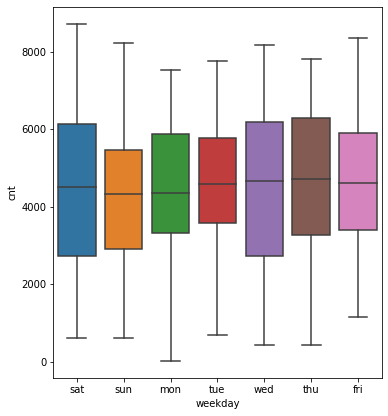

In [50]:
plt.figure(figsize=(20,15))
plt.subplot(2,3,4)
sns.boxplot(x='weekday',y='cnt',data=data)

<AxesSubplot:xlabel='workingday', ylabel='cnt'>

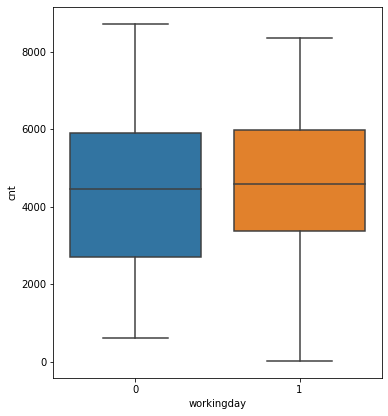

In [49]:
plt.figure(figsize=(20,15))
plt.subplot(2,3,5)
sns.boxplot(x='workingday',y='cnt',data=data)

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

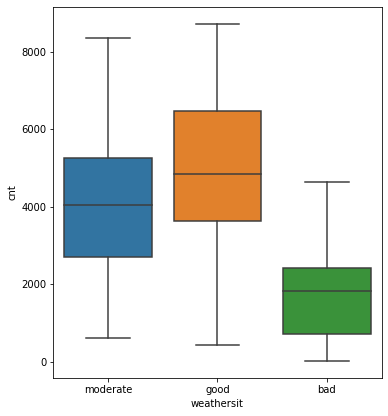

In [48]:
plt.figure(figsize=(20,15))
plt.subplot(2,3,6)
sns.boxplot(x='weathersit',y='cnt',data=data)

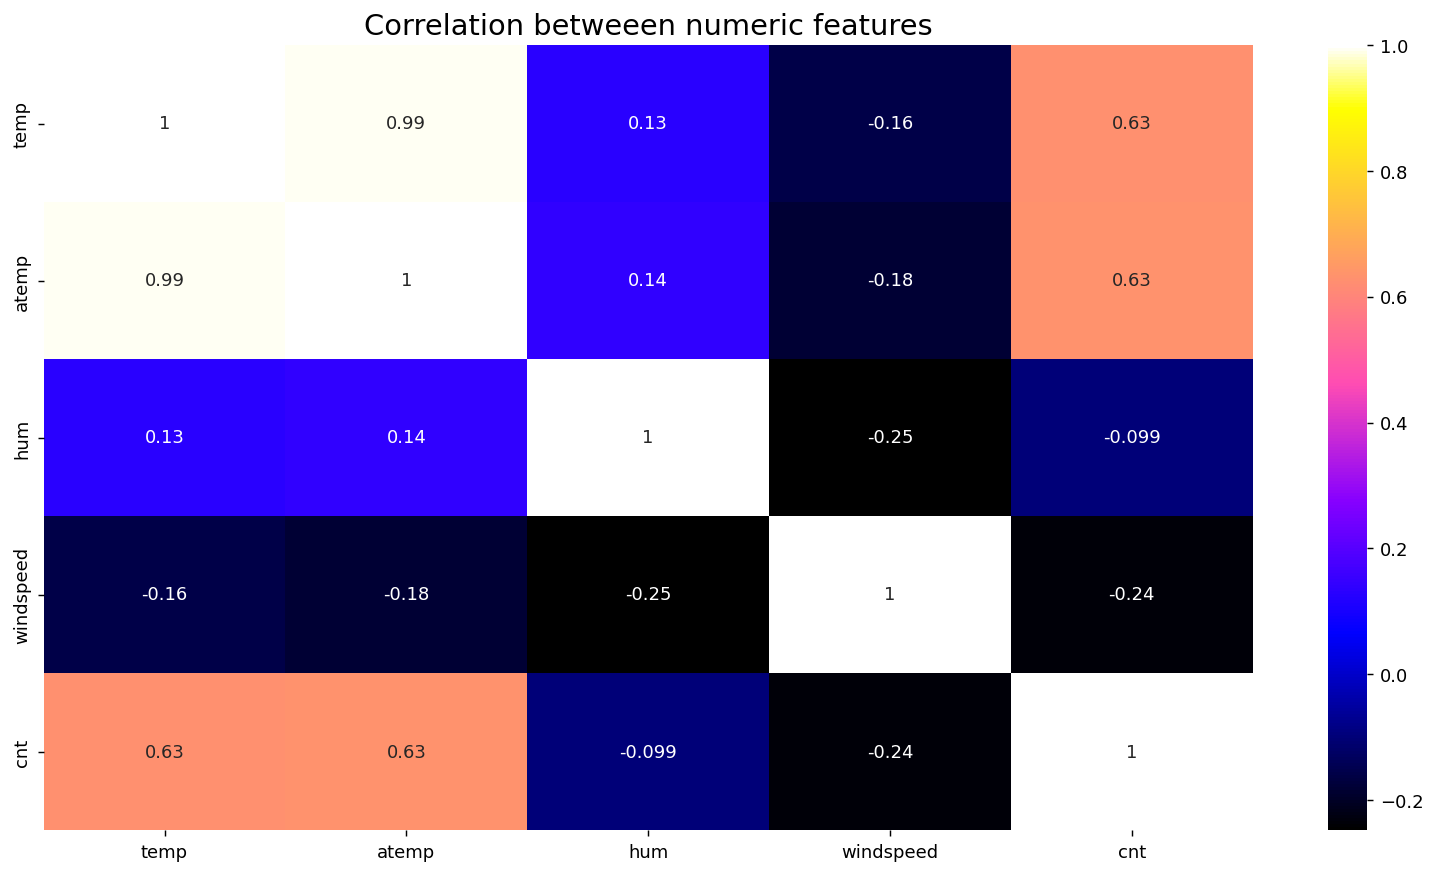

In [55]:
num_features = ["temp","atemp","hum","windspeed","cnt"]
plt.figure(figsize=(15,8),dpi=130)
plt.title("Correlation betweeen numeric features",fontsize=16)
sns.heatmap(data[num_features].corr(),annot= True,cmap="gnuplot2")
plt.show()

In [56]:
#Preparing data for linar regression

In [57]:
#For categorical variables, dummy variables are created.
data = pd.get_dummies(data=data,columns=["season","mnth","weekday"],drop_first=True)
data = pd.get_dummies(data=data,columns=["weathersit"])

In [58]:
data.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [59]:
data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,1,0,1,0


In [60]:
#Splitting the train and test
data.shape

(730, 31)

In [61]:
#y is a variable that only contains the target variable.
y=data.pop('cnt')

In [64]:
#All remaining variables, as well as our independent variables, are X.
X=data

In [65]:
#Train Test splitting - 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [67]:
X.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1,0,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [68]:
#Checking shape and size of train and test data set
print(X_train.shape)

(511, 30)


In [69]:
print(X_test.shape)

(219, 30)


In [70]:
#scale continuous variables
num_var = ['temp','atemp','hum','windspeed']

In [72]:
# we can Use Normalized scaler to scale
scaler = MinMaxScaler()
#Fit and transform training set only
X_train[num_var] = scaler.fit_transform(X_train[num_var])

In [73]:
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.00000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.669276,0.550874,0.526518,0.654174,0.414873,0.230920,0.258317,0.250489,...,0.09002,0.148728,0.150685,0.152642,0.146771,0.131115,0.140900,0.029354,0.624266,0.346380
std,0.500067,0.163398,0.470935,0.227231,0.212976,0.143648,0.185619,0.421834,0.438138,0.433719,...,0.28649,0.356169,0.358092,0.359994,0.354224,0.337857,0.348259,0.168963,0.484786,0.476282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354221,0.353207,0.544598,0.281934,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575304,0.563297,0.659940,0.384732,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745079,0.698389,0.756977,0.526481,0.000000,1.000000,0.500000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [74]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
683,1,0,1,0.327133,0.322150,0.639330,0.327101,0,0,1,...,0,0,0,0,1,0,0,0,0,1
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0,0,1,...,0,1,0,0,0,0,0,0,0,1
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0,1,0,...,0,1,0,0,0,0,0,0,1,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,1,0,0,...,0,0,0,0,0,1,0,0,0,1
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0,0,1,...,0,0,0,0,0,0,1,0,0,1


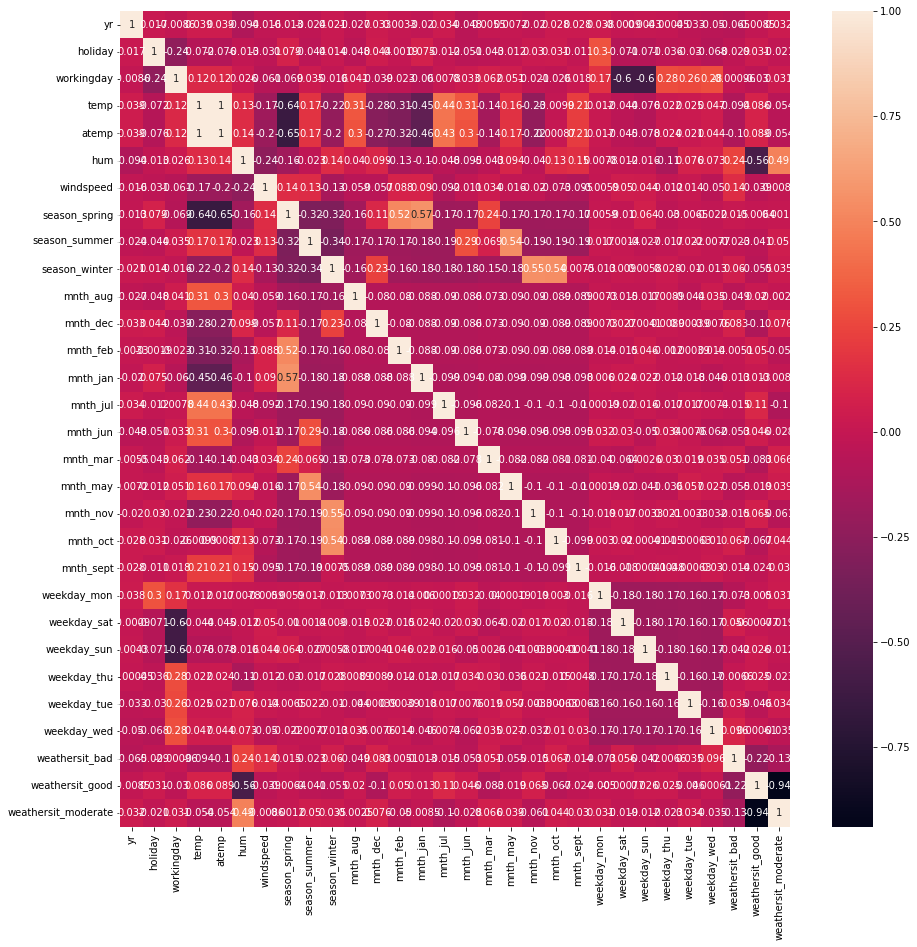

In [77]:
#Determining whether or not the variables are highly connected
plt.figure(figsize = (15,15))  
sns.heatmap(X_train.corr(), annot = True)
plt.show()

In [78]:
#Building model using RFE(Recursive Feature Elimination)
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [98]:
#Using an automated approach, reduce the number of features to 15.
rfe = RFE(lr, step=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), step=15)

In [99]:
#RFE-selected columns and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 2),
 ('season_winter', True, 1),
 ('mnth_aug', False, 2),
 ('mnth_dec', False, 2),
 ('mnth_feb', False, 2),
 ('mnth_jan', False, 2),
 ('mnth_jul', False, 2),
 ('mnth_jun', False, 2),
 ('mnth_mar', False, 2),
 ('mnth_may', False, 2),
 ('mnth_nov', False, 2),
 ('mnth_oct', False, 2),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 2),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 2),
 ('weekday_tue', False, 2),
 ('weekday_wed', False, 2),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

In [100]:
#Function to use the statsmodel api to generate a model.
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [101]:
#Function to compute and print VIFs -Takes as a parameter the columns for which VIFs are to be calculated.
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [102]:
#RFE has chosen the columns to print. For these columns, we'll manually remove them.
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weekday_sun', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [103]:
# Features which is not selected by RFE
X_train.columns[~rfe.support_]

Index(['season_summer', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct',
       'weekday_mon', 'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [104]:
# For regression, we'll use 15 columns supported by RFE.
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']]

In [105]:
X_train_rfe.shape

(511, 15)

In [106]:
#model 1
#Picked columns for Model 1 - RFE selected all columns
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     167.9
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          4.52e-183
Time:                        00:46:54   Log-Likelihood:                -4131.1
No. Observations:                 511   AIC:                             8294.
Df Residuals:                     495   BIC:                             8362.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2373.1199    

In [107]:
#model2
# The variable mnth_jan has been droped because it has a negative coefficient and is insignificant due to its high p-value.

In [109]:
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     180.2
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          3.59e-184
Time:                        00:48:28   Log-Likelihood:                -4131.2
No. Observations:                 511   AIC:                             8292.
Df Residuals:                     496   BIC:                             8356.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2357.7484    

In [110]:
#Model-3
# The variable hum was dropped since it has a negative coefficient and is insignificant due to its high p-value.

In [111]:
cols = ['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     186.5
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          1.46e-181
Time:                        00:50:11   Log-Likelihood:                -4140.1
No. Observations:                 511   AIC:                             8308.
Df Residuals:                     497   BIC:                             8368.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1524.3398    

In [112]:
#model4
# holiday has been dropped because it has a negative coefficient and is inconsequential due to its high p-value.

In [113]:
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     200.9
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          4.56e-182
Time:                        00:52:29   Log-Likelihood:                -4141.7
No. Observations:                 511   AIC:                             8309.
Df Residuals:                     498   BIC:                             8364.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1458.3161    

In [114]:
#model5
# The variable mnth_jul,temp has been dropped because it has a negative coefficient and is insignificant due to its high p-value.

In [115]:
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     217.9
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          1.57e-182
Time:                        00:53:36   Log-Likelihood:                -4143.4
No. Observations:                 511   AIC:                             8311.
Df Residuals:                     499   BIC:                             8362.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1392.1476    

In [116]:
#Attempting to replace July with spring, as the two seasons were highly correlated.

In [117]:
#removal of working day, Summer, and addition of temporary
cols6 = ['yr','season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate','temp']
build_model(cols6)
get_vif(cols6)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     251.1
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          2.33e-179
Time:                        00:55:13   Log-Likelihood:                -4156.6
No. Observations:                 511   AIC:                             8333.
Df Residuals:                     501   BIC:                             8376.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1849.3111    

In [118]:
#VIF appears to be fairly universally acknowledged in this area. All of the features have a p-value of virtually 0.0, and R2 is 0.82. As a result, we complete this model for future use.

In [120]:
#Create a model with all columns to automatically select features.
def building_model(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [121]:
#we will use sklearn to create the final model.

In [122]:
#Create a model using the columns listed above.
lr = building_model(X_train[cols6],y_train)
print(lr.intercept_,lr.coef_)

1849.3111141436211 [ 2001.88568746 -1170.12801426  -482.89359595   494.76805882
   483.00061976  -335.8335287  -2305.32363933  -665.38449026
  3917.73381585]


In [123]:
y_train_pred = lr.predict(X_train[cols6])

In [124]:
#plotting the histogram of the error term
def plot_error_terms(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

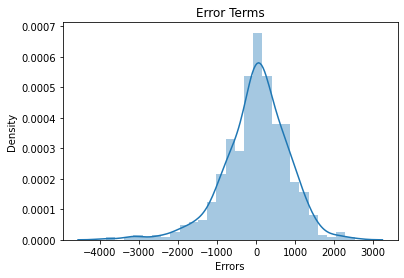

In [125]:
plot_error_terms(y_train, y_train_pred)

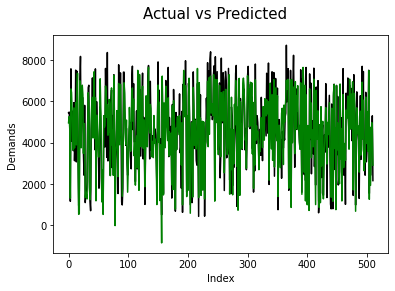

In [130]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="black")
plt.plot(c,y_train_pred, color="green")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

In [131]:
#Model Predictions

In [132]:
#R-Squared value for train predictions

In [133]:
#Printing the R-squared Value
r2_score(y_train,y_train_pred)

0.8185359364498817

In [134]:
#Value prediction on a test dataset

In [135]:
#Scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed']
#Only test data will be modified,no fitting will be done.
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [136]:
cols6 = ['yr','season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate','temp']

#Predicting test data values
y_test_pred = lr.predict(X_test[cols6])

In [137]:
#For test predictions, the R-squared value

In [138]:
# Calculate the R squared difference between the test and forecasted test data sets
r2_score(y_test,y_test_pred)

0.8159036088393238

In [139]:
#reviewing the model

In [140]:
#r2 score is used to evaluate the model (as specified in the problem statement)
y_pred=y_test_pred
r2_score(y_test, y_pred)

0.8159036088393238

Text(0, 0.5, 'y_pred')

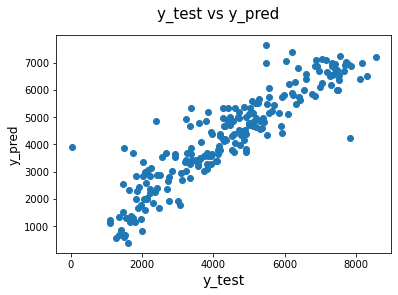

In [141]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 15)             
plt.xlabel('y_test', fontsize = 14)                          
plt.ylabel('y_pred', fontsize = 12) 

In [142]:
#Let's use statsmodel to interpret the final model of the manual + rfe technique.

In [143]:
cols6 = ['yr','season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate','temp']

In [144]:
lm = build_model(cols6)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     251.1
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          2.33e-179
Time:                        01:10:56   Log-Likelihood:                -4156.6
No. Observations:                 511   AIC:                             8333.
Df Residuals:                     501   BIC:                             8376.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1849.3111    

In [ ]:
#Prominent determinants that can be used to forecast demand for shared bikes:
#holiday
#temp
#hum
#windspeed
#Season
#months(January, July, September, November, December)
#Year
#Sunday
#weathersit( Light Snow, Mist + Cloud